In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import scipy.stats as stat

In [253]:
cofactorsmapped = pd.read_csv("data/cofactors_mapped_combined.csv").drop("Unnamed: 0", axis = 1)
mediator = cofactorsmapped[cofactorsmapped["Complex"] == "Mediator"].set_index("Bgee")
mediator["Subcomplex or Module"] = mediator["Subcomplex or Module"].apply(lambda x: x.replace("]", "").replace("[", "").split(", "))
mediator.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,Notes,Source,UniprotID,Entry Name,Protein names,Gene Names,Sequence,Ensembl,GeneID,PDB,Primary Gene Name
Bgee,,,,,,,,,,,,,,,,
ENSG00000133997,MED6,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),O75586,MED6_HUMAN,Mediator of RNA polymerase II transcription su...,MED6 ARC33,MAAVDIRDNLLGISWVDSSWIPILNSGSVLDYFSERSNPFYDRTCN...,ENST00000256379.10 [O75586-1];ENST00000430055....,10001.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED6
ENSG00000159479,MED8,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q96G25,MED8_HUMAN,Mediator of RNA polymerase II transcription su...,MED8,MQREEKQLEASLDALLSQVADLKNSLGSFICKLENEYGRLTWPSVL...,ENST00000290663.10 [Q96G25-2];ENST00000372455....,112950.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED8
ENSG00000161920,MED11,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q9P086,MED11_HUMAN,Mediator of RNA polymerase II transcription su...,MED11 HSPC296,MATYSLANERLRALEDIEREIGAILQNAGTVILELSKEKTNERLLD...,ENST00000293777.6;,400569.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED11
ENSG00000042429,MED17,Mediator,"[Head, Middle]",NaN,NaN,Central scaffold of head unit,Malik and Roeder (2023),Q9NVC6,MED17_HUMAN,Mediator of RNA polymerase II transcription su...,MED17 ARC77 CRSP6 DRIP77 DRIP80 TRAP80,MSGVRAVRISIESACEKQVHEVGLDGTETYLPPLSMSQNLARLAQR...,ENST00000251871.9 [Q9NVC6-1];,9440.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED17
ENSG00000130772,MED18,Mediator,[Head],NaN,NaN,NaN,Malik and Roeder (2023),Q9BUE0,MED18_HUMAN,Mediator of RNA polymerase II transcription su...,MED18,MEAPPVTMMPVTGGTINMMEYLLQGSVLDHSLESLIHRLRGLCDNM...,ENST00000373842.9;ENST00000398997.2;ENST000006...,54797.0,7EMF;7ENA;7ENC;7ENJ;7LBM;7NVR;8GXQ;8GXS;8T9D;,MED18


In [254]:
scrna = pd.read_csv("helperdata/cofactor_scRNA.csv").drop("Unnamed: 0", axis = 1)
scRNA_mediator = scrna[[x in mediator.index.to_list() for x in scrna["Ensembl"]]].set_index("Ensembl")
scRNA_mediator.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000008838,MED24,15.5,16.9,31.7,12.4,12.1,10.1,11.0,193.3,12.6,...,8.2,14.6,10.2,12.6,13.4,11.5,13.5,20.7,10.7,28.5
ENSG00000042429,MED17,8.0,5.6,5.1,15.5,27.5,11.3,7.8,8.9,18.6,...,2.7,11.7,9.6,10.7,7.1,13.2,7.8,13.8,23.2,11.5
ENSG00000063322,MED29,31.4,24.0,35.2,8.4,36.6,23.4,40.3,30.7,23.3,...,46.2,48.8,36.0,31.1,15.3,27.7,26.8,30.0,43.1,27.3
ENSG00000099917,MED15,23.9,49.9,27.5,25.1,20.2,29.7,19.0,23.5,21.9,...,27.2,11.7,21.6,21.9,13.7,25.1,27.6,61.3,40.8,20.9
ENSG00000104973,MED25,9.9,15.3,15.0,16.1,18.4,10.1,13.2,16.6,12.6,...,76.2,26.3,11.7,49.1,42.7,11.4,13.4,40.2,13.5,21.5


In [255]:
specificity = pd.read_csv("helperdata/cofactor_specificity.csv").drop("Unnamed: 0", axis = 1)
scRNA_specificity = specificity[[x in mediator.index.to_list() for x in specificity["Ensembl"]]].set_index("Ensembl")
scRNA_specificity.head()

,Gene,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,,,,,,,,,,,
ENSG00000008838,MED24,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Basal respiratory cells': '193.3', 'Ionocyte...",Low cell type specificity,Detected in all,NaN,NaN,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,MED17,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,{'Rod photoreceptor cells': '49.4'},Low cell type specificity,Detected in all,NaN,NaN,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,MED29,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,MED15,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,MED25,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,{'Late spermatids': '108.4'},Low cell type specificity,Detected in all,NaN,NaN,0.27,0.63,0.11,0.37,0.27


In [256]:
scRNA_taus = scRNA_specificity[[x for x in scRNA_specificity.columns.to_list() if "TAU" in x]]
scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))
scRNA_taus.head()

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26057/1983826795.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scRNA_taus = scRNA_taus.applymap(lambda x: np.NaN if x == "Not detected" else float(x))


,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,
ENSG00000008838,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,0.27,0.63,0.11,0.37,0.27


In [257]:
mediator_combined = scRNA_mediator[["Gene"]].copy()
mediator_combined = mediator_combined.join(mediator[["Subcomplex or Module"]])
mediator_combined["Fraction Expressed"] = scRNA_mediator.apply(lambda x: np.count_nonzero(x)/len(x), axis=1)
mediator_combined = mediator_combined.join(scRNA_taus)
mediator_combined.head()

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000008838,MED24,[Tail],1.0,0.22,0.26,0.05,0.48,0.08
ENSG00000042429,MED17,"[Head, Middle]",1.0,0.36,0.25,0.17,0.39,0.11
ENSG00000063322,MED29,[Tail],1.0,0.23,0.14,0.05,0.27,0.13
ENSG00000099917,MED15,[Tail],1.0,0.21,0.23,0.06,0.24,0.12
ENSG00000104973,MED25,[Tail],1.0,0.27,0.63,0.11,0.37,0.27


In [258]:
def get_module(modulename):
    module = mediator_combined[[modulename in x for x in mediator_combined["Subcomplex or Module"]]].drop("Subcomplex or Module", axis = 1).set_index("Gene")
    return module

def meltmodule(moduledf, taulist):
    moduleplt = moduledf.reset_index().drop("Fraction Expressed", axis=1).melt(id_vars="Gene", var_name="Category", value_name="Tau Score")
    moduleplt["Category"] = moduleplt["Category"].apply(lambda x: x.replace("TAU score - ", ""))
    moduleplt["Specificity"] = moduleplt["Tau Score"].apply(lambda x: "Specific" if x > 0.4 else "Unspecific")
    moduleplt = moduleplt[[x in taulist for x in moduleplt["Category"]]]
    return moduleplt


In [259]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26057/4236845216.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=0)


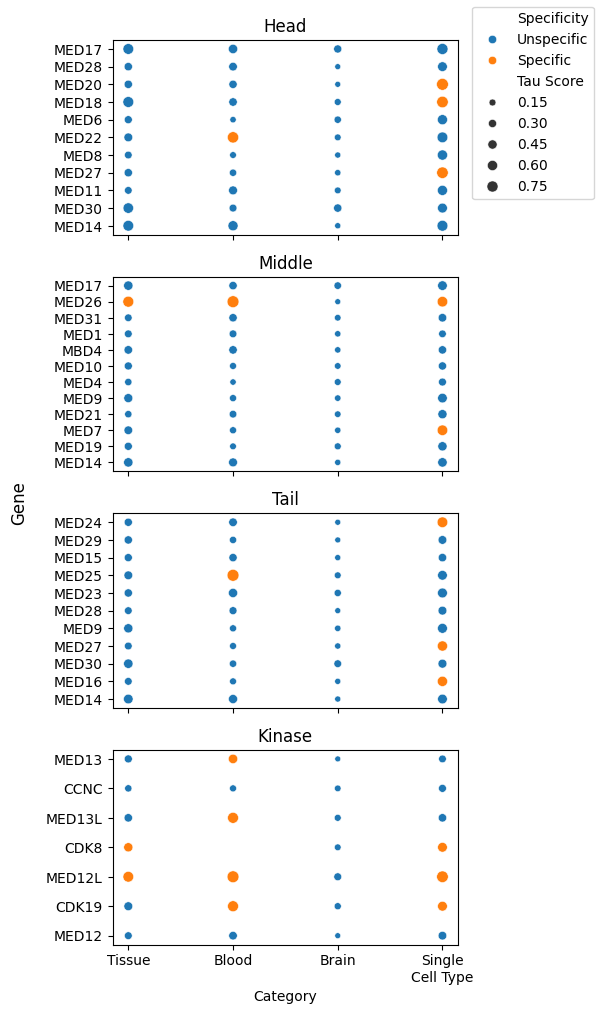

In [260]:

labellst = ["Head", "Middle", "Tail", "Kinase"]
taulst = ["Tissue", "Single Cell Type", "Blood", "Brain"]

fig, axs = plt.subplots(len(labellst), figsize = (6, 10), sharex=True)
fig.supylabel("Gene")

for label_i in range(len(labellst)):
    label = labellst[label_i]
    module = get_module(label)
    moduleplt = meltmodule(module, taulst)
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=True)
    handles, labels = axs[label_i].get_legend_handles_labels()
    axs[label_i].clear()
    sns.scatterplot(moduleplt, y = "Gene", x = "Category", size = "Tau Score", hue = "Specificity", ax= axs[label_i], legend=False)
    axs[label_i].set_ylabel('')
    axs[label_i].set_title(label)


plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Prevent overlap, leave space for legend
fig.legend(
    handles=handles,
    labels=labels,
    loc = "upper right"
)
plt.tight_layout(rect=[0, 0, 0.85, 1])
wrap_labels(axs[label_i], 10)

plt.savefig("figures/mediatorspecificity.png")


In [261]:
kinase = meltmodule(get_module("Kinase"), taulst)
kinase_specific = kinase[kinase["Specificity"] == "Specific"]
kinase_specific = scRNA_specificity[[x in kinase_specific["Gene"].unique() for x in scRNA_specificity["Gene"]]]

In [262]:
def RNAcellspecificity(df):
    df = df[["Gene", "RNA single cell type specific nTPM"]]

    cellspecific_cells = pd.DataFrame({"Cell Type": [], "Genes": []}).set_index("Cell Type")

    for _, row in df.iterrows():
        celldict = row["RNA single cell type specific nTPM"]
        if pd.notna(celldict):
            cell_dict = ast.literal_eval(celldict)
            for cell, _ in cell_dict.items():
                if cell not in cellspecific_cells.index.to_list():
                    cellspecific_cells.loc[cell] = [[]]
                cellspecific_cells.at[cell, "Genes"].append(row["Gene"])

    return cellspecific_cells

def subcomplex_RNAcellspecificity(label):
    module = meltmodule(get_module(label), taulst)
    modulespecific = module[module["Specificity"] == "Specific"]
    modulespecific = scRNA_specificity[[x in modulespecific["Gene"].unique() for x in scRNA_specificity["Gene"]]]
    return RNAcellspecificity(modulespecific)


head = subcomplex_RNAcellspecificity("Head")
middle = subcomplex_RNAcellspecificity("Middle")
tail = subcomplex_RNAcellspecificity("Tail")
kinase = subcomplex_RNAcellspecificity("Kinase")

In [263]:
head

,Genes
Cell Type,
Syncytiotrophoblasts,[MED20]
Excitatory neurons,[MED27]
Oligodendrocytes,[MED27]


In [264]:
middle

,Genes
Cell Type,
dendritic cells,[MED26]
Early spermatids,"[MED26, MED7]"
Late spermatids,"[MED26, MED7]"
Spermatocytes,"[MED26, MED7]"


In [265]:
tail

,Genes
Cell Type,
Basal respiratory cells,[MED24]
Ionocytes,[MED24]
Late spermatids,[MED25]
Excitatory neurons,[MED27]
Oligodendrocytes,[MED27]
Oocytes,[MED16]


In [266]:
kinase

,Genes
Cell Type,
Microglial cells,[MED13L]
Oligodendrocyte precursor cells,"[MED13L, CDK8, MED12L, CDK19]"
Excitatory neurons,"[CDK8, MED12L]"
Inhibitory neurons,"[CDK8, MED12L]"
Late spermatids,"[CDK8, CDK19]"
Oligodendrocytes,"[CDK8, CDK19]"
Astrocytes,[MED12L]
Prostatic glandular cells,[CDK19]


In [267]:
med12L = mediator[mediator["Gene Name"] == "MED12L"]
med12L.head()

,Gene Name,Complex,Subcomplex or Module,Own-complex paralog,Other-complex Paralogues,Notes,Source,UniprotID,Entry Name,Protein names,Gene Names,Sequence,Ensembl,GeneID,PDB,Primary Gene Name
Bgee,,,,,,,,,,,,,,,,
ENSG00000144893,MED12L,Mediator,[Kinase],[MED12],NaN,NaN,"Nayak, Shraddha et al. (2022)",Q86YW9,MD12L_HUMAN,Mediator of RNA polymerase II transcription su...,MED12L KIAA1635 TNRC11L TRALP TRALPUSH PRO0314,MAAFGLLSYEQRPLKRPRLGPPDVYPQDPKQKEDELTAVNVKQGFN...,ENST00000309237.8 [Q86YW9-3];ENST00000422248.6...,116931.0,NaN,MED12L


In [268]:
med12 = mediator[mediator["Gene Name"] == "MED12"]
med12["Sequence"][0]

/var/folders/rq/l7tf3_nx0ml2t2rb_tgxvm280000gn/T/ipykernel_26057/892147568.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  med12["Sequence"][0]


'MAAFGILSYEHRPLKRPRLGPPDVYPQDPKQKEDELTALNVKQGFNNQPAVSGDEHGSAKNVSFNPAKISSNFSSIIAEKLRCNTLPDTGRRKPQVNQKDNFWLVTARSQSAINTWFTDLAGTKPLTQLAKKVPIFSKKEEVFGYLAKYTVPVMRAAWLIKMTCAYYAAISETKVKKRHVDPFMEWTQIITKYLWEQLQKMAEYYRPGPAGSGGCGSTIGPLPHDVEVAIRQWDYTEKLAMFMFQDGMLDRHEFLTWVLECFEKIRPGEDELLKLLLPLLLRYSGEFVQSAYLSRRLAYFCTRRLALQLDGVSSHSSHVISAQSTSTLPTTPAPQPPTSSTPSTPFSDLLMCPQHRPLVFGLSCILQTILLCCPSALVWHYSLTDSRIKTGSPLDHLPIAPSNLPMPEGNSAFTQQVRAKLREIEQQIKERGQAVEVRWSFDKCQEATAGFTIGRVLHTLEVLDSHSFERSDFSNSLDSLCNRIFGLGPSKDGHEISSDDDAVVSLLCEWAVSCKRSGRHRAMVVAKLLEKRQAEIEAERCGESEAADEKGSIASGSLSAPSAPIFQDVLLQFLDTQAPMLTDPRSESERVEFFNLVLLFCELIRHDVFSHNMYTCTLISRGDLAFGAPGPRPPSPFDDPADDPEHKEAEGSSSSKLEDPGLSESMDIDPSSSVLFEDMEKPDFSLFSPTMPCEGKGSPSPEKPDVEKEVKPPPKEKIEGTLGVLYDQPRHVQYATHFPIPQEESCSHECNQRLVVLFGVGKQRDDARHAIKKITKDILKVLNRKGTAETDQLAPIVPLNPGDLTFLGGEDGQKRRRNRPEAFPTAEDIFAKFQHLSHYDQHQVTAQVSRNVLEQITSFALGMSYHLPLVQHVQFIFDLMEYSLSISGLIDFAIQLLNELSVVEAELLLKSSDLVGSYTTSLCLCIVAVLRHYHACLILNQDQMAQVFEGLCGVVKHGMNRSDGSSAERCILAYLYDLYTSCSHLKNKFGELFSDFCSK

In [269]:
mediator_combined[mediator_combined["Gene"] == "MED12L" ]

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000144893,MED12L,[Kinase],0.804878,0.68,0.88,0.26,0.84,0.28


In [270]:
mediator_combined[mediator_combined["Gene"] == "MED12"]

,Gene,Subcomplex or Module,Fraction Expressed,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
Ensembl,,,,,,,,
ENSG00000184634,MED12,[Kinase],0.987805,0.25,0.35,0.05,0.36,0.25


In [271]:
MED12_scrna = scRNA_mediator[scRNA_mediator["Gene"] == "MED12"]
MED12L_scrna = scRNA_mediator[scRNA_mediator["Gene"] == "MED12L"]


<Axes: ylabel='Gene'>

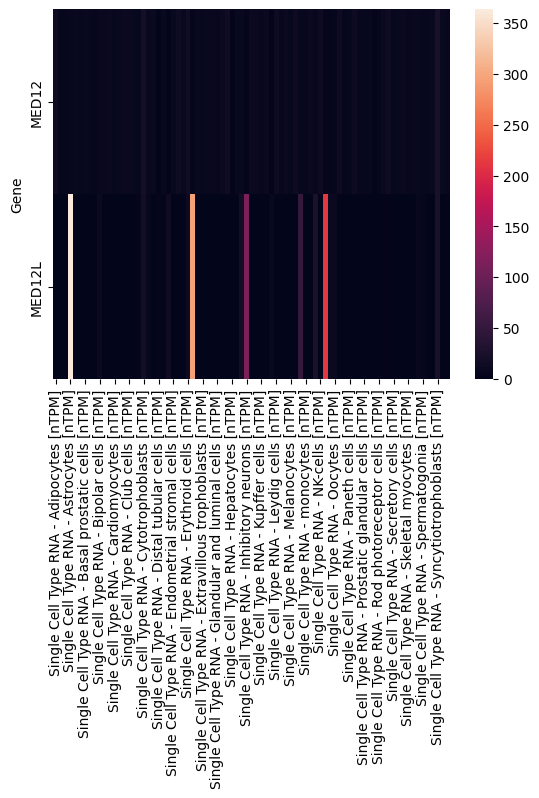

In [272]:
sns.heatmap(pd.concat([MED12_scrna, MED12L_scrna], axis=0).set_index("Gene"))

In [273]:
MED12L_scrna.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000144893,MED12L,0.0,0.0,0.2,363.5,1.3,1.4,0.7,0.4,1.1,...,0.0,1.0,0.5,6.9,4.6,0.3,0.5,24.2,0.6,0.1


In [274]:
tf_scrna = pd.read_csv("helperdata/TF_scRNA.csv").drop("Unnamed: 0", axis=1).set_index("Ensembl")
tf_scrna.head()

,Gene,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000137203,TFAP2A,1.7,0.2,0.3,0.0,0.1,106.0,63.2,46.0,158.0,...,0.0,0.0,4.9,7.8,16.4,139.1,115.4,700.8,1.1,1.1
ENSG00000008196,TFAP2B,0.5,0.0,0.0,0.0,0.2,7.4,0.6,0.1,92.0,...,0.0,0.0,2.3,1.4,0.7,23.1,2.4,4.1,0.1,0.0
ENSG00000087510,TFAP2C,1.3,3.5,10.6,3.7,0.7,95.0,22.0,2.6,105.0,...,0.0,0.0,5.8,0.2,1.6,70.5,92.4,107.6,1.0,1.6
ENSG00000008197,TFAP2D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
ENSG00000116819,TFAP2E,0.2,0.2,0.5,4.6,0.2,2.0,0.0,0.2,0.0,...,0.0,0.0,0.4,2.2,0.2,0.4,2.8,0.3,0.5,0.2


In [275]:
tf_scrna_genes = tf_scrna.set_index("Gene")
MED12L_scrna_arr = MED12L_scrna.iloc[0][1:]
MED12_scrna_arr = MED12_scrna.iloc[0][1:]

In [276]:
import scipy.stats as stat
from scipy.spatial import distance

In [277]:
MED12L_dists = []
MED12_dists = []
MED12L_corrs = []
MED12_corrs = []

for i in range(len(tf_scrna_genes)):
    row = tf_scrna_genes.iloc[i]
    MED12L_dists.append(distance.euclidean(MED12L_scrna_arr, row))
    MED12L_corrs.append(stat.pearsonr(MED12L_scrna_arr, row).statistic)
    MED12_dists.append(distance.euclidean(MED12_scrna_arr, row))
    MED12_corrs.append(stat.pearsonr(MED12_scrna_arr, row).statistic)

dist_df = pd.DataFrame({"Gene": tf_scrna_genes.index.to_list(), "Distance from MED12L": MED12L_dists, "Distance from MED12": MED12_dists,
                        "MED12L Corr": MED12L_corrs, "MED12 Corr": MED12_corrs})

dist_df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Gene,Distance from MED12L,Distance from MED12,MED12L Corr,MED12 Corr
0,TFAP2A,1009.807363,851.093414,-0.036825,0.481437
1,TFAP2B,652.741626,391.365609,-0.034220,-0.056669
2,TFAP2C,582.058013,236.859283,-0.080768,0.261946
3,TFAP2D,530.073089,79.914141,0.037050,-0.127515
4,TFAP2E,518.503848,74.763026,0.461056,-0.133799


(0.0, 2000.0)

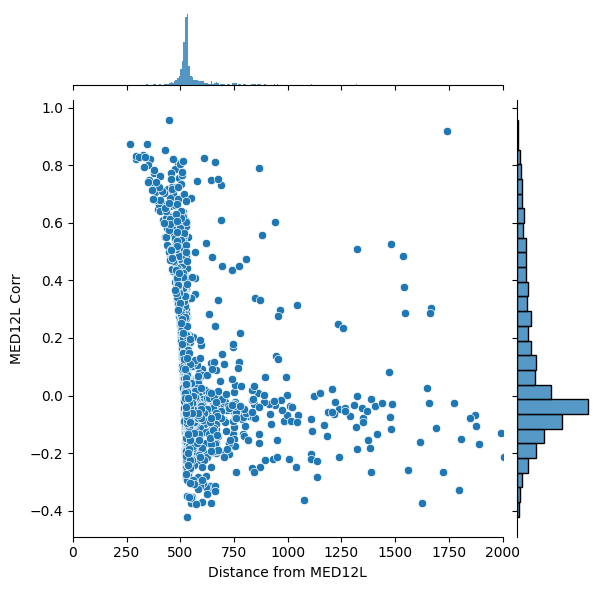

In [278]:
sns.jointplot(data = dist_df, x = "Distance from MED12L", y = "MED12L Corr")
plt.xlim(0, 2000)

In [279]:
lambert_MED12L_like_TFs_dist = dist_df[dist_df["Distance from MED12L"] <= np.percentile(dist_df["Distance from MED12L"], 5)]
lambert_MED12L_like_TFs_dist_5percentile = lambert_MED12L_like_TFs_dist["Gene"]
lambert_MED12L_like_TFs_corr = dist_df[dist_df["MED12L Corr"] >= np.percentile(dist_df["MED12L Corr"], 0.95)]

<Axes: ylabel='Gene'>

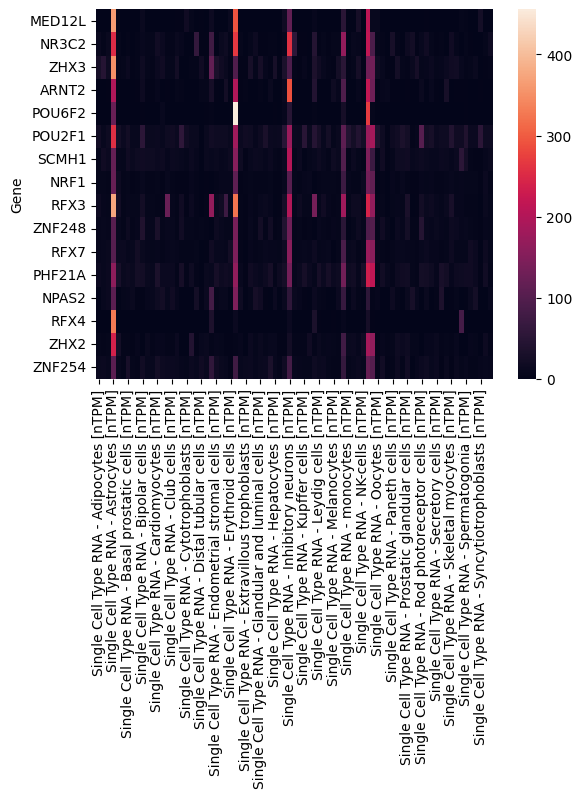

In [280]:
MED12L_similar_TF = dist_df.sort_values("Distance from MED12L")[:15]["Gene"]
MED12L_similar = pd.concat([MED12L_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12L_similar_TF]])
sns.heatmap(MED12L_similar)

<Axes: ylabel='Gene'>

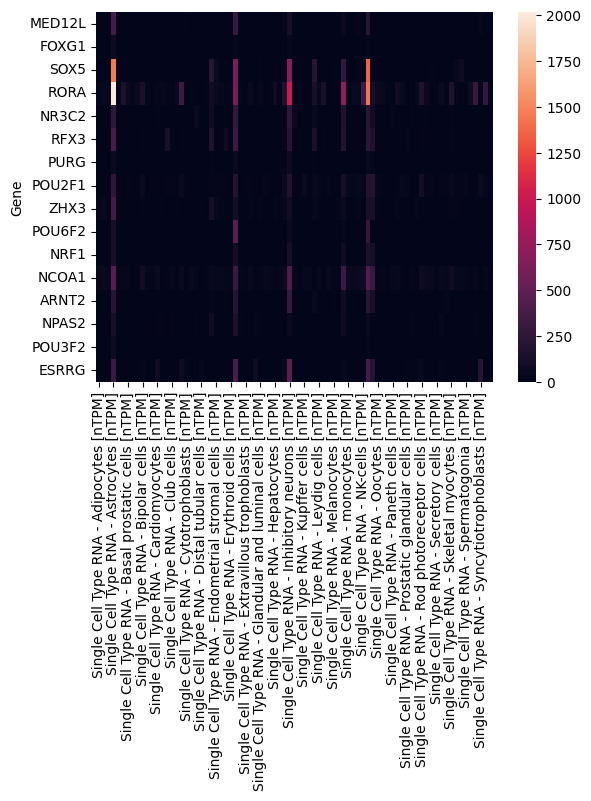

In [281]:
MED12L_similar_TF = dist_df.sort_values("MED12L Corr", ascending= False)[:15]["Gene"]
MED12L_similar = pd.concat([MED12L_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12L_similar_TF]])
sns.heatmap(MED12L_similar)

<Axes: ylabel='Gene'>

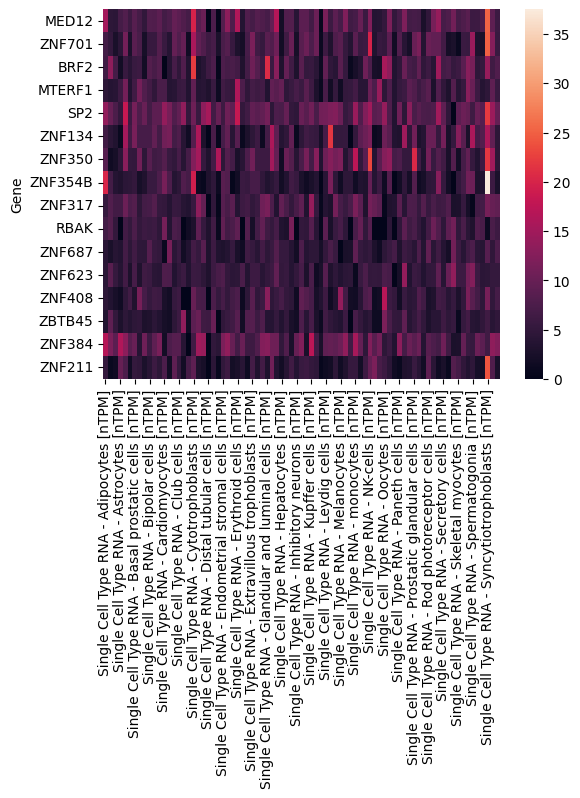

In [282]:
MED12_similar_TF = dist_df.sort_values("Distance from MED12")[:15]["Gene"]
MED12_similar = pd.concat([MED12_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12_similar_TF]])
sns.heatmap(MED12_similar)

<Axes: ylabel='Gene'>

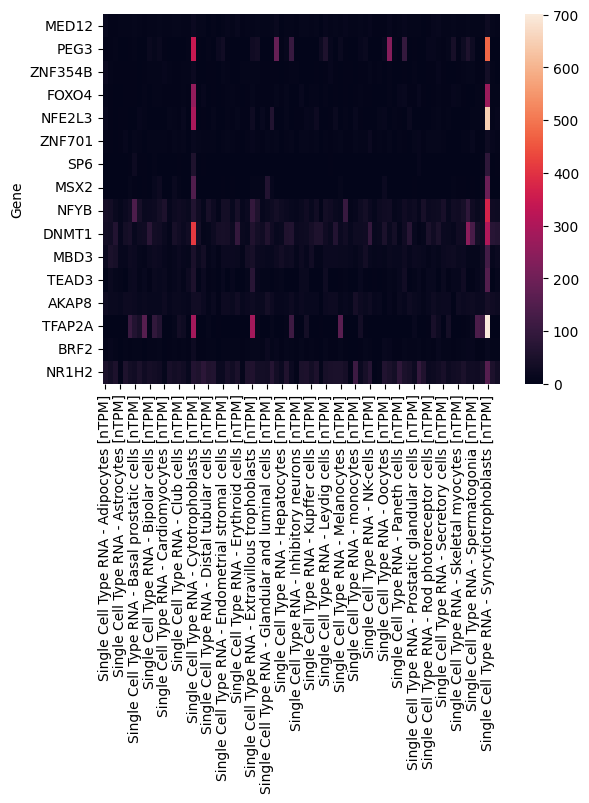

In [283]:
MED12_similar_TF = dist_df.sort_values("MED12 Corr", ascending= False)[:15]["Gene"]
MED12_similar = pd.concat([MED12_scrna.set_index("Gene"), tf_scrna_genes.loc[MED12_similar_TF]])
sns.heatmap(MED12_similar)

---
Protein Atlas Transcription Factors

In [284]:
proteinatlas_TFs = pd.read_csv("data/proteinatlas-TFs.tsv", sep="\t")
proteinatlas_TF_scRNA = pd.read_csv("helperdata/proteinatlasTF_scRNA.csv").drop("Unnamed: 0", axis=1).fillna(0)
proteinatlas_TF_scRNA = proteinatlas_TF_scRNA.drop("Ensembl", axis=1).set_index("Gene")

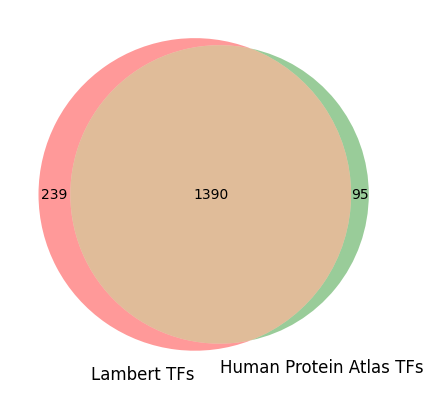

In [285]:
#Compare Lambert TFs to protein atlas
lambert_TFs_ensembl = set(tf_scrna.index.to_list())
proteinatlas_TFs_ensembl = set(proteinatlas_TFs["Ensembl"].to_list())

from matplotlib_venn import venn2
venn2([lambert_TFs_ensembl, proteinatlas_TFs_ensembl], ("Lambert TFs", "Human Protein Atlas TFs"))
plt.savefig("figures/lambert_vs_proteinatlas_TF_count.png")

In [286]:
#Building map of Gene-Ensembl names
alltf_mapper = tf_scrna.reset_index()[["Gene", "Ensembl"]].merge(proteinatlas_TFs[["Gene", "Ensembl"]], left_on = "Ensembl", right_on = "Ensembl", how="outer")
alltf_mapper["Gene"] = alltf_mapper.apply(lambda x: x["Gene_x"] if pd.isna(x["Gene_y"]) else x["Gene_y"], axis=1)
alltf_mapper = alltf_mapper[["Ensembl", "Gene"]]

def genetoensembl_tf(gene):
    return alltf_mapper[alltf_mapper["Gene"] == gene]["Ensembl"].values[0]
def ensembltogene_tf(ensembl):
    return alltf_mapper[alltf_mapper["Ensembl"] == ensembl]["Gene"].values[0]

genetoensembl_tf("ADNP")

'ENSG00000101126'

In [287]:
#Combine all TFs
lambertonly_ensembls = [x for x in lambert_TFs_ensembl if x not in proteinatlas_TFs_ensembl] 
lambertonlyscRNA = tf_scrna.loc[lambertonly_ensembls]
allTF_scRNA = pd.concat([proteinatlas_TF_scRNA, lambertonlyscRNA.set_index("Gene")])
allTF_scRNA.head()

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ADNP,42.9,49.9,32.7,81.1,34.8,48.9,52.2,23.1,29.0,37.7,...,38.1,35.1,39.8,26.5,34.5,30.2,40.6,22.0,41.0,33.1
ADNP2,15.9,13.4,17.0,20.7,9.4,30.9,16.5,10.9,18.6,16.4,...,0.0,6.8,13.6,43.9,38.1,24.1,32.0,9.6,16.9,14.6
AEBP2,21.2,14.8,22.7,30.0,24.1,58.1,29.7,17.1,52.3,23.5,...,13.6,18.5,37.6,16.0,24.9,52.1,63.2,87.5,30.2,11.8
AHR,75.9,73.1,67.8,1.5,25.0,47.0,34.6,57.8,55.0,18.3,...,10.9,4.9,35.0,1.6,1.9,27.9,45.7,20.8,47.2,10.6
AIRE,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.2,0.0,0.0,0.0,0.1,0.3,0.2,0.2


In [288]:
#Calculate distance and Pearson correlation between TFs and MED12L
MED12L_dists = []
MED12L_corrs = []

for i in range(len(allTF_scRNA)):
    row = allTF_scRNA.iloc[i]
    MED12L_dists.append(distance.euclidean(MED12L_scrna_arr, row))
    MED12L_corrs.append(stat.pearsonr(MED12L_scrna_arr, row).statistic)

MED12L_TF_comparison_df = pd.DataFrame({"Gene": allTF_scRNA.index.to_list(), "Distance from MED12L": MED12L_dists,
                        "MED12L Corr": MED12L_corrs})


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [289]:
MED12L_TF_comparison_df

,Gene,Distance from MED12L,MED12L Corr
0,ADNP,486.174855,0.568790
1,ADNP2,507.012426,0.141476
2,AEBP2,500.531687,0.269842
3,AHR,745.729187,-0.136128
4,AIRE,529.283553,0.243198
...,...,...,...
1719,NANOGP8,530.304403,-0.060129
1720,SGSM2,477.372821,0.394901
1721,CENPA,533.402353,-0.095844
1722,TRAFD1,529.185412,-0.100946


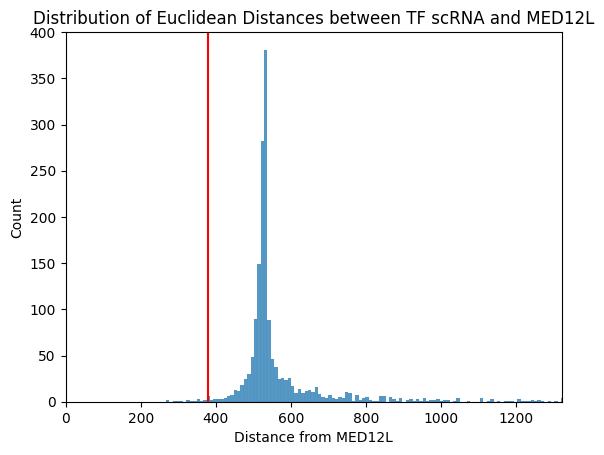

In [290]:
sns.histplot(MED12L_TF_comparison_df, x = "Distance from MED12L")
plt.xlim(0, np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 95))
plt.axvline(np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 1), color = "r")
plt.title("Distribution of Euclidean Distances between TF scRNA and MED12L")
plt.savefig("figures/distancedistTF_MED12L.png")

In [291]:
len(MED12L_TF_comparison_df[MED12L_TF_comparison_df["Distance from MED12L"] <= np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 1)].sort_values("Distance from MED12L")), len(MED12L_TF_comparison_df[MED12L_TF_comparison_df["Distance from MED12L"] <= np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 5)].sort_values("Distance from MED12L"))


(18, 87)

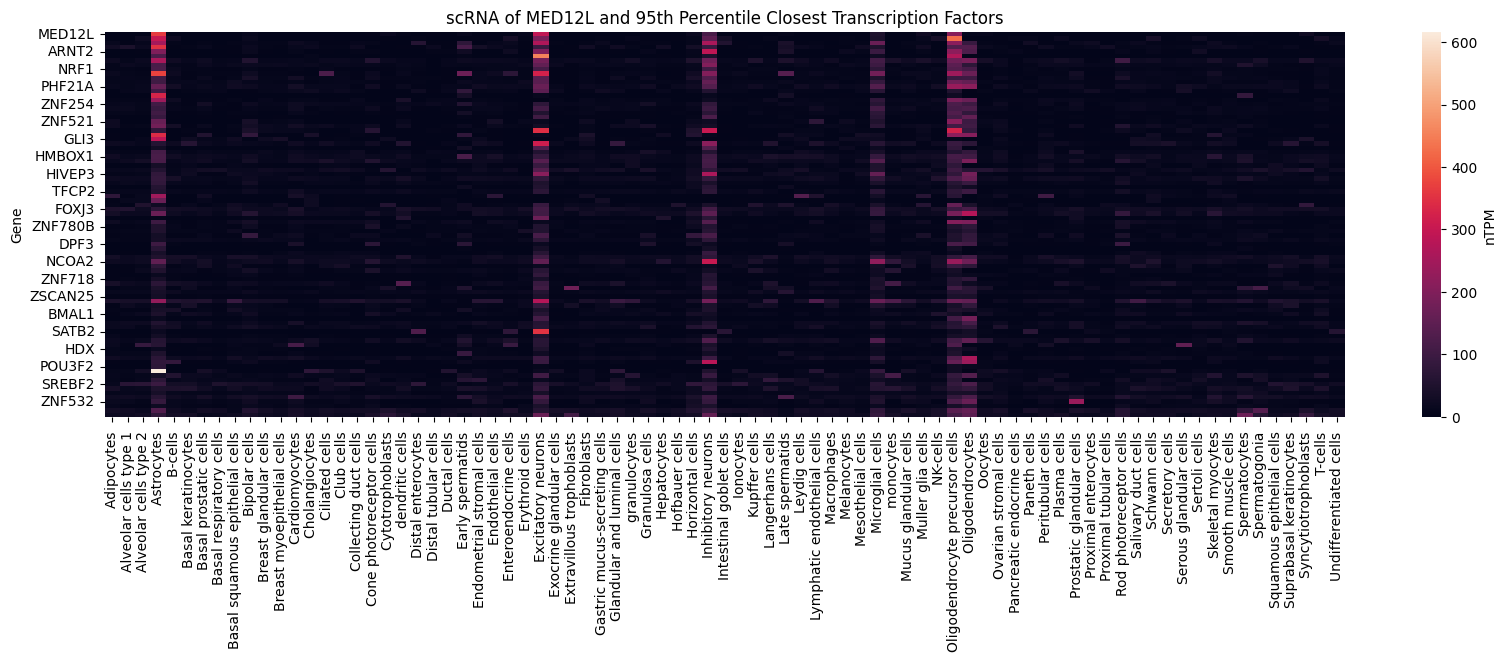

In [292]:
#Get x percentile
filteredpercentile = 5
MED12L_proteinatlasTF_similar_TF = MED12L_TF_comparison_df[MED12L_TF_comparison_df["Distance from MED12L"] <= np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], filteredpercentile)].sort_values("Distance from MED12L")
MED12L_proteinatlasTF_similar_TF

MED12L_proteinatlasTF_similar_TF["Ensembl"] = MED12L_proteinatlasTF_similar_TF["Gene"].apply(genetoensembl_tf)
protatlas_similar_scRNA = proteinatlas_TF_scRNA.loc[[x for x in MED12L_proteinatlasTF_similar_TF["Gene"].to_list() if x in proteinatlas_TF_scRNA.index.to_list()]]
lambert_similar_scRNA = tf_scrna.loc[[x for x in MED12L_proteinatlasTF_similar_TF["Ensembl"].to_list() if x in tf_scrna.index.to_list()]].set_index("Gene")
MED12L_similar_scRNA = pd.concat([protatlas_similar_scRNA, lambert_similar_scRNA]).drop_duplicates()
#sort in order of shortest distance
MED12L_similar_scRNA = MED12L_similar_scRNA.merge(MED12L_TF_comparison_df[["Gene", "Distance from MED12L"]], left_on="Gene", right_on="Gene").sort_values("Distance from MED12L").drop("Distance from MED12L", axis=1).set_index("Gene")

MED12L_similar_scRNA = pd.concat([MED12L_scrna.set_index("Gene"), MED12L_similar_scRNA]) #Add MED12L_scRNA to heatmap
MED12L_similar_scRNA.columns = MED12L_similar_scRNA.columns.str.replace("Single Cell Type RNA - ", '', regex=False)
MED12L_similar_scRNA.columns = MED12L_similar_scRNA.columns.str.replace("[nTPM]", '', regex=False)

plt.figure(figsize=(20, 5))
sns.heatmap(MED12L_similar_scRNA, cbar_kws={'label': 'nTPM'})
plt.title("scRNA of MED12L and {0}th Percentile Closest Transcription Factors".format(100-filteredpercentile))
plt.savefig("figures/MED12LsimilarscRNATFs_{0}percentile.png".format(100-filteredpercentile), bbox_inches='tight')

In [293]:
#95th percentile similar TFs to retrieve more data from HPA
MED12L_proteinatlasTF_similar_TF_5percent = MED12L_TF_comparison_df[MED12L_TF_comparison_df["Distance from MED12L"] <= np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], 5)].sort_values("Distance from MED12L")
MED12L_proteinatlasTF_similar_TF_5percent["Ensembl"] = MED12L_proteinatlasTF_similar_TF_5percent["Gene"].apply(genetoensembl_tf)

In [294]:
MED12L_similar_annotations = pd.read_csv("helperdata/MED12Lsimilar-annotations.csv").drop("Unnamed: 0", axis=1)
MED12L_similar_annotations = MED12L_similar_annotations.merge(MED12L_TF_comparison_df[["Gene", "Distance from MED12L"]], left_on="Gene", right_on="Gene")

filteredpercentile = 5
MED12L_similar_annotations = MED12L_similar_annotations[MED12L_similar_annotations["Distance from MED12L"] <= np.percentile(MED12L_TF_comparison_df["Distance from MED12L"], filteredpercentile)]

import ast
for lstcol in ["Protein class", "Biological process", "Molecular function", "Subcellular location"]:
    MED12L_similar_annotations[lstcol] = MED12L_similar_annotations[lstcol].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else "Unknown")

MED12L_similar_annotations.head()

,Gene,Ensembl,Gene description,Protein class,Biological process,Molecular function,Subcellular location,Single cell expression cluster,Interactions,Distance from MED12L
0,TOX,ENSG00000198846,Thymocyte selection associated high mobility g...,"[Predicted intracellular proteins, Transcripti...","[Neurogenesis, Transcription, Transcription re...","[Chromatin regulator, DNA-binding]","[Nucleoplasm, Nucleoli fibrillar center]",Cluster 65: Neurons - Synaptic function,5.0,267.533456
1,NR3C2,ENSG00000151623,Nuclear receptor subfamily 3 group C member 2,"[Disease related genes, FDA approved drug targ...","[Transcription, Transcription regulation]","[DNA-binding, Receptor]",[Nucleoplasm],Cluster 34: Neurons - Neuronal signaling,5.0,267.898750
2,ZHX3,ENSG00000174306,Zinc fingers and homeoboxes 3,"[Plasma proteins, Predicted intracellular prot...","[Differentiation, Transcription, Transcription...","[DNA-binding, Repressor]",[Nucleoplasm],Cluster 47: Astrocytes - Unknown function,9.0,292.674017
3,ARNT2,ENSG00000172379,Aryl hydrocarbon receptor nuclear translocator 2,"[Disease related genes, Human disease related ...","[Transcription, Transcription regulation]",[DNA-binding],[Nucleoplasm],Cluster 69: Neurons - Neuronal signaling,26.0,295.190278
4,POU6F2,ENSG00000106536,POU class 6 homeobox 2,"[Disease related genes, Human disease related ...","[Transcription, Transcription regulation]",[DNA-binding],Unknown,Cluster 34: Neurons - Neuronal signaling,103.0,308.842112


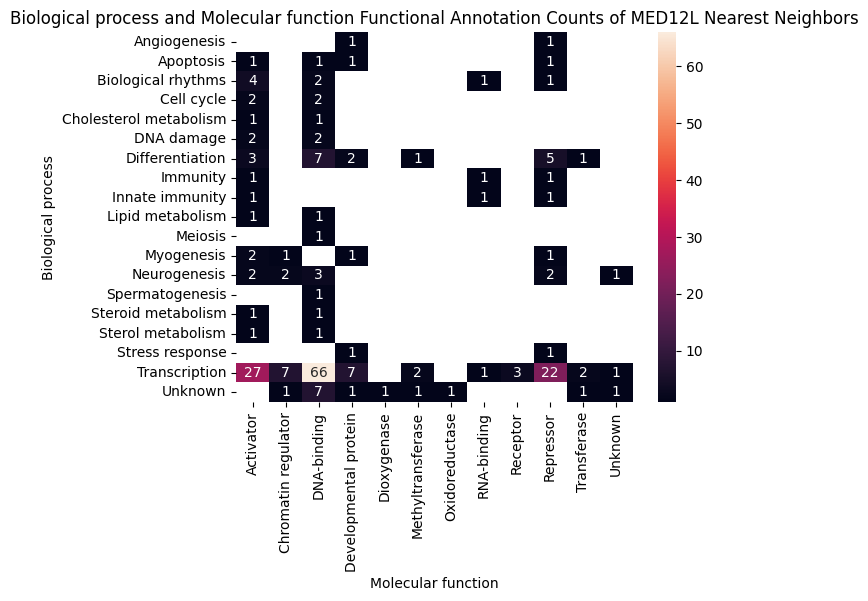

In [295]:
def xy_pivot(df_i, indexcol, columncol):
    df = df_i.explode(indexcol).explode(columncol).pivot_table(index=indexcol, columns=columncol, values = "Gene", aggfunc="count")
    #remove transcription regulation (duplicate of transcription annotation)
    if (indexcol == "Biological process"):
        df = df.loc[[x != "Transcription regulation" for x in df.index.to_list()]]
    elif columncol == "Biological process":
        df = df[[x != "Transcription regulation" for x in df["Biological process"]]]

    if len(df) > 20:
        annotb = False
    else:
        annotb = True

    sns.heatmap(df, annot=annotb)
    plt.title("{0} and {1} Functional Annotation Counts of MED12L Nearest Neighbors".format(indexcol, columncol))

xy_pivot(MED12L_similar_annotations, "Biological process", "Molecular function")
plt.savefig("figures/MED12Lneighbor_annotationpivot1.png", bbox_inches='tight')

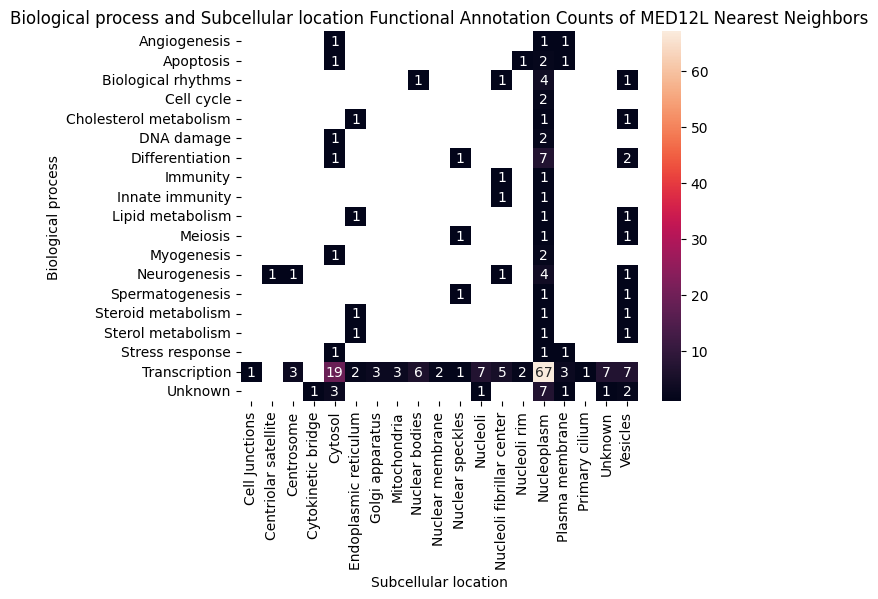

In [296]:
xy_pivot(MED12L_similar_annotations, "Biological process", "Subcellular location")
plt.savefig("figures/MED12Lneighbor_annotationpivot2.png", bbox_inches='tight')

In [297]:
#All TFs annotation pivot
lambertonlyTF_annot = pd.read_csv("helperdata/lambertonlyTF-annotations.csv").drop("Unnamed: 0", axis=1)
proteinatlas_TFs_annot = proteinatlas_TFs[[x for x in proteinatlas_TFs.columns.to_list() if x in lambertonlyTF_annot.columns.to_list()]]
TFs_annot = pd.concat([proteinatlas_TFs_annot, lambertonlyTF_annot])

def ast_or_split(x):
    if pd.notna(x):
        if x[0] == "[":
            return ast.literal_eval(x)
        else:
            return x.split(", ")
    else:
        return "Unknown"

for lstcol in ["Protein class", "Biological process", "Molecular function", "Subcellular location"]:
    TFs_annot[lstcol] = TFs_annot[lstcol].apply(lambda x: ast_or_split(x))


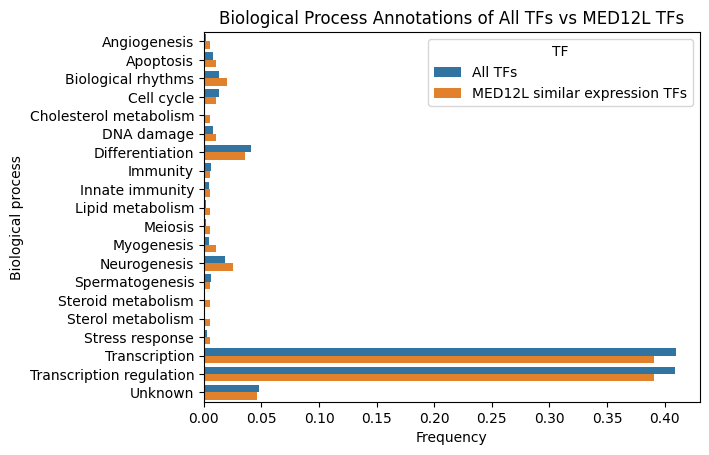

In [298]:
TF_bioprocess = TFs_annot.explode("Biological process")
TF_bioprocess = TF_bioprocess.loc[[x in MED12L_similar_annotations.explode("Biological process")["Biological process"].unique() for x in TF_bioprocess["Biological process"]]]
TF_bioprocess_count = TF_bioprocess.groupby("Biological process").agg("count")[["Gene"]].rename({"Gene": "Frequency"}, axis=1)
TF_bioprocess_count["TF"] = "All TFs"
TF_bioprocess_count["Frequency"] = TF_bioprocess_count["Frequency"]/len(TF_bioprocess)
MED12L_similar_process = MED12L_similar_annotations.explode("Biological process").groupby("Biological process").agg("count")[["Gene"]].rename({"Gene": "Frequency"}, axis=1)
MED12L_similar_process["TF"] = "MED12L similar expression TFs"
MED12L_similar_process["Frequency"] = MED12L_similar_process["Frequency"]/len(MED12L_similar_annotations.explode("Biological process"))

bioprocess_count_comparison = pd.concat([TF_bioprocess_count, MED12L_similar_process])
sns.barplot(bioprocess_count_comparison.reset_index(), y = "Biological process", x = "Frequency", hue = "TF", errorbar="sd")
plt.title("Biological Process Annotations of All TFs vs MED12L TFs")
plt.savefig("figures/bioprocess_TF_MED12LTF.png", bbox_inches="tight")

Power_divergenceResult(statistic=0.09415781903023958, pvalue=0.9999999998324928)

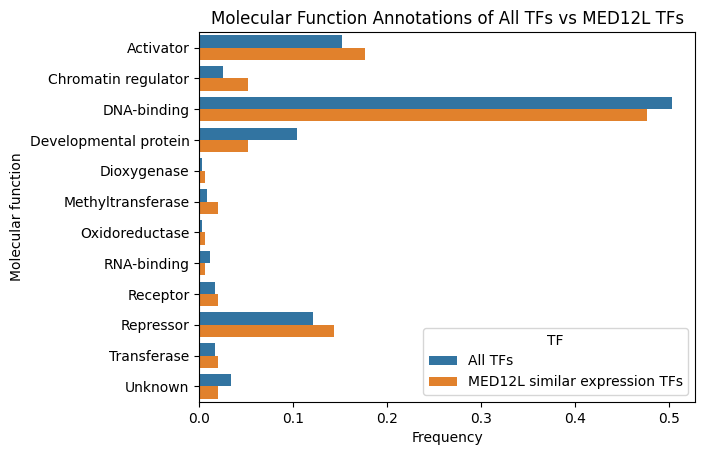

In [299]:
TF_bioprocess = TFs_annot.explode("Molecular function")
TF_bioprocess = TF_bioprocess.loc[[x in MED12L_similar_annotations.explode("Molecular function")["Molecular function"].unique() for x in TF_bioprocess["Molecular function"]]]
TF_bioprocess_count = TF_bioprocess.groupby("Molecular function").agg("count")[["Gene"]].rename({"Gene": "Frequency"}, axis=1)
TF_bioprocess_count["TF"] = "All TFs"
TF_bioprocess_count["Frequency"] = TF_bioprocess_count["Frequency"]/len(TF_bioprocess)
MED12L_similar_process = MED12L_similar_annotations.explode("Molecular function").groupby("Molecular function").agg("count")[["Gene"]].rename({"Gene": "Frequency"}, axis=1)
MED12L_similar_process["TF"] = "MED12L similar expression TFs"
MED12L_similar_process["Frequency"] = MED12L_similar_process["Frequency"]/len(MED12L_similar_annotations.explode("Molecular function"))

bioprocess_count_comparison = pd.concat([TF_bioprocess_count, MED12L_similar_process])
plt.title("Molecular Function Annotations of All TFs vs MED12L TFs")
sns.barplot(bioprocess_count_comparison.reset_index(), y = "Molecular function", x = "Frequency", hue = "TF", errorbar="sd")
plt.savefig("figures/molecularfunction_TF_MED12LTF.png", bbox_inches="tight")

stat.chisquare(MED12L_similar_process["Frequency"].values, TF_bioprocess_count["Frequency"].values)

In [300]:
def chisquare(annotationlabel):
    TF_bioprocess = TFs_annot.explode(annotationlabel)
    TF_bioprocess_count = TF_bioprocess.groupby(annotationlabel).agg("count")[["Gene"]].rename({"Gene": "Frequency Across All TFs"}, axis=1)
    TF_bioprocess_count["Frequency Across All TFs"] = TF_bioprocess_count["Frequency Across All TFs"]/len(TF_bioprocess)
    MED12L_similar_process = MED12L_similar_annotations.explode(annotationlabel)
    MED12L_similar_process_count = MED12L_similar_process.groupby(annotationlabel).agg("count")[["Gene"]].rename({"Gene": "Frequency Across MED12L-like"}, axis=1)
    MED12L_similar_process_count["Frequency Across MED12L-like"] = MED12L_similar_process_count["Frequency Across MED12L-like"]/len(MED12L_similar_process)

    test = TF_bioprocess_count.merge(MED12L_similar_process_count, left_index=True, right_index=True, how="left").fillna(0)
    return stat.chisquare(test["Frequency Across MED12L-like"].values, test["Frequency Across All TFs"].values)

print(chisquare("Molecular function"))
print(chisquare("Subcellular location"))
print(chisquare("Biological process"))
print(chisquare("Protein class"))

Power_divergenceResult(statistic=0.11790414899249856, pvalue=1.0)
Power_divergenceResult(statistic=1.4547909173555147, pvalue=1.0)
Power_divergenceResult(statistic=0.19642255171560563, pvalue=1.0)
Power_divergenceResult(statistic=0.017739094257912234, pvalue=1.0)


In [301]:
#Calculate distance and Pearson correlation between TFs and MED12L
MED12_dists = []
MED12_corrs = []

for i in range(len(allTF_scRNA)):
    row = allTF_scRNA.iloc[i]
    MED12_dists.append(distance.euclidean(MED12_scrna_arr, row))
    MED12_corrs.append(stat.pearsonr(MED12_scrna_arr, row).statistic)

MED12_TF_comparison_df = pd.DataFrame({"Gene": allTF_scRNA.index.to_list(), "Distance from MED12": MED12_dists,
                        "MED12 Corr": MED12_corrs})


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


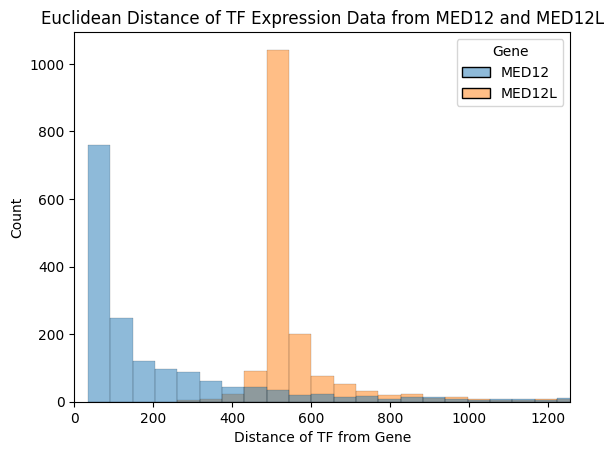

In [302]:
MED12_TFcomparison = pd.DataFrame({"Distance of TF from Gene": MED12_TF_comparison_df["Distance from MED12"], "Gene": "MED12"})
MED12L_TFcomparison = pd.DataFrame({"Distance of TF from Gene": MED12L_TF_comparison_df["Distance from MED12L"], "Gene": "MED12L"})

MED12_L_TFcomparison = pd.concat([MED12_TFcomparison, MED12L_TFcomparison], axis=0)

sns.histplot(MED12_L_TFcomparison, x = "Distance of TF from Gene", hue = "Gene")
plt.xlim(0, np.percentile(MED12_L_TFcomparison["Distance of TF from Gene"], 95))
plt.title("Euclidean Distance of TF Expression Data from MED12 and MED12L")
plt.savefig("figures/distanceshist_med12_med12L.png")

---
### TFs and AD/RD annotation

In [306]:
MED12L_similar_annotations

,Gene,Ensembl,Gene description,Protein class,Biological process,Molecular function,Subcellular location,Single cell expression cluster,Interactions,Distance from MED12L
0,TOX,ENSG00000198846,Thymocyte selection associated high mobility g...,"[Predicted intracellular proteins, Transcripti...","[Neurogenesis, Transcription, Transcription re...","[Chromatin regulator, DNA-binding]","[Nucleoplasm, Nucleoli fibrillar center]",Cluster 65: Neurons - Synaptic function,5.0,267.533456
1,NR3C2,ENSG00000151623,Nuclear receptor subfamily 3 group C member 2,"[Disease related genes, FDA approved drug targ...","[Transcription, Transcription regulation]","[DNA-binding, Receptor]",[Nucleoplasm],Cluster 34: Neurons - Neuronal signaling,5.0,267.898750
2,ZHX3,ENSG00000174306,Zinc fingers and homeoboxes 3,"[Plasma proteins, Predicted intracellular prot...","[Differentiation, Transcription, Transcription...","[DNA-binding, Repressor]",[Nucleoplasm],Cluster 47: Astrocytes - Unknown function,9.0,292.674017
3,ARNT2,ENSG00000172379,Aryl hydrocarbon receptor nuclear translocator 2,"[Disease related genes, Human disease related ...","[Transcription, Transcription regulation]",[DNA-binding],[Nucleoplasm],Cluster 69: Neurons - Neuronal signaling,26.0,295.190278
4,POU6F2,ENSG00000106536,POU class 6 homeobox 2,"[Disease related genes, Human disease related ...","[Transcription, Transcription regulation]",[DNA-binding],Unknown,Cluster 34: Neurons - Neuronal signaling,103.0,308.842112
...,...,...,...,...,...,...,...,...,...,...
82,RCOR3,ENSG00000117625,REST corepressor 3,"[Predicted intracellular proteins, Transcripti...","[Transcription, Transcription regulation]",[Repressor],"[Nucleoplasm, Cytosol]",Cluster 68: Cardiomyocytes - Muscle contraction,50.0,469.740801
83,ZNF532,ENSG00000074657,Zinc finger protein 532,"[Predicted intracellular proteins, Transcripti...","[Transcription, Transcription regulation]",[DNA-binding],"[Nucleoplasm, Golgi apparatus]",Cluster 40: Prostatic glandular cells - Transc...,NaN,471.236777
84,ZNF529,ENSG00000186020,Zinc finger protein 529,"[Predicted intracellular proteins, Transcripti...","[Transcription, Transcription regulation]",[DNA-binding],[Nucleoplasm],Cluster 55: Non-specific - Transcription,1.0,471.288139
85,ZNF518A,ENSG00000177853,Zinc finger protein 518A,"[Predicted intracellular proteins, Transcripti...","[Transcription, Transcription regulation]","[Chromatin regulator, DNA-binding]",[Nucleoplasm],Cluster 67: Spermatogonia - Spermatogenesis,3.0,471.523499


In [308]:
#get ADs and RDs

,Unnamed: 0,Gene,Ensembl,RNA tissue specificity,RNA tissue distribution,RNA tissue specificity score,RNA tissue specific nTPM,RNA single cell type specificity,RNA single cell type distribution,RNA single cell type specificity score,RNA single cell type specific nTPM,RNA single nuclei brain specificity,RNA single nuclei brain distribution,RNA single nuclei brain specificity score,RNA single nuclei brain specific nTPM,TAU score - Tissue,TAU score - Blood,TAU score - Brain,TAU score - Single Cell Type,TAU score - Single nuclei brain
0,0,ABRAXAS1,ENSG00000163322,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in all,NaN,"{'Early spermatids': '92.3', 'Spermatocytes': ...",Cell type enriched,Detected in all,4.0,{'choroid plexus epithelial cell': '109.0'},0.36,0.31,0.15,0.47,0.52
1,0,AEBP1,ENSG00000106624,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Fibroblasts': '277.4', 'Leydig cells': '148....",Group enriched,Detected in many,13.0,"{'astrocyte': '112.8', 'ependymal cell': '79.3...",0.27,0.89,0.18,0.71,0.77
2,0,AHCTF1,ENSG00000153207,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'monocytes': '91.1', 'Spermatocytes': '96.9'}",Low cell type specificity,Detected in all,NaN,NaN,0.34,0.70,0.14,0.36,0.08
3,0,AHR,ENSG00000106546,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'granulocytes': '187.3', 'Langerhans cells': ...",Cell type enhanced,Detected in many,NaN,{'hippocampal dentate gyrus': '46.1'},0.36,0.58,0.18,0.48,0.49
4,0,AIRE,ENSG00000160224,Tissue enhanced,Detected in single,NaN,{'lymphoid tissue': '1.3'},Cell type enhanced,Detected in some,NaN,"{'Excitatory neurons': '1.1', 'Horizontal cell...",Cell type enhanced,Detected in many,NaN,"{'deep-layer near-projecting': '9.8', 'fibrobl...",0.90,Not detected,0.26,0.91,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19029,0,ZNF687,ENSG00000143373,Low tissue specificity,Detected in all,NaN,NaN,Low cell type specificity,Detected in many,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.31,0.71,0.08,0.32,0.33
19030,0,ZSCAN20,ENSG00000121903,Low tissue specificity,Detected in many,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Early spermatids': '13.0', 'Late spermatids'...",Low cell type specificity,Detected in many,NaN,NaN,0.40,Not detected,0.07,0.78,0.41
19031,0,ZXDA,ENSG00000198205,Low tissue specificity,Detected in many,NaN,NaN,Low cell type specificity,Detected in many,NaN,NaN,Low cell type specificity,Detected in all,NaN,NaN,0.27,Not detected,0.14,0.48,0.27
19032,0,ZXDB,ENSG00000198455,Low tissue specificity,Detected in all,NaN,NaN,Cell type enhanced,Detected in many,NaN,"{'Basal keratinocytes': '19.2', 'Suprabasal ke...",Low cell type specificity,Detected in all,NaN,NaN,0.41,Not detected,0.06,0.52,0.25


---
### Cluster exploration

In [304]:
cluster34 = pd.read_csv("data/proteinatlas-cluster34.tsv", sep="\t")
cluster34scRNA = pd.read_csv("helperdata/cluster34_scRNA.csv").drop("Unnamed: 0", axis=1)
cluster34scRNA = cluster34scRNA.drop("Ensembl", axis=1).set_index("Gene")
cluster34scRNA.head()

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
ABCB6,0.1,0.4,0.5,13.9,0.2,0.4,0.4,0.2,1.8,0.7,...,0.0,0.0,0.5,0.5,0.1,2.8,0.4,0.2,0.3,0.1
ABLIM2,4.8,0.9,1.1,9.0,0.5,2.7,0.3,0.1,0.7,4.7,...,2.7,46.8,4.6,0.4,2.3,2.4,8.3,0.1,1.2,4.2
ACACA,6.2,29.9,64.5,131.0,8.5,18.1,17.8,14.4,24.4,13.0,...,8.2,3.9,9.3,20.4,17.6,27.0,21.2,16.5,8.2,10.4
ACTL6B,0.0,0.0,0.0,1.9,0.0,0.0,0.0,0.0,0.2,3.9,...,0.0,0.0,0.0,1.1,0.6,0.2,0.1,0.0,0.0,0.0
ADAM11,0.3,0.0,0.0,10.2,0.2,0.2,0.1,0.1,0.2,7.0,...,0.0,0.0,0.8,0.6,0.6,0.1,0.3,0.3,0.1,0.3


In [305]:

MED12L_cluster34_dists = []
MED12L_cluster34_corrs = []

for i in range(len(cluster34scRNA)):
    row = cluster34scRNA.iloc[i]
    MED12L_cluster34_dists.append(dist(MED12L_scrna_arr, row))
    MED12L_cluster34_corrs.append(stat.pearsonr(MED12L_scrna_arr, row).statistic)\

MED12L_dist_df = pd.DataFrame({"Gene": cluster34scRNA.index.to_list(), "Distance from MED12L": MED12L_cluster34_dists,
                        "MED12L Corr": MED12L_cluster34_corrs})

MED12L_similar_TF = MED12L_dist_df.sort_values("Distance from MED12L")[:15]["Gene"]
sns.heatmap(cluster34scRNA.loc[MED12L_similar_TF])

NameError: name 'dist' is not defined

In [316]:
MED12L_dist_comb = MED12L_dist_df.merge(cluster34).set_index("Gene").sort_values("Distance from MED12L")[["Protein class", "Biological process", "Distance from MED12L", "MED12L Corr"]]
MED12L_dist_comb = MED12L_dist_comb.drop("MED12L", axis=0)
MED12L_dist_comb.head()

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
BRINP1,"Predicted intracellular proteins, Transporters","Cell cycle, Growth arrest, Neurogenesis",212.659046,0.923804
WDR17,"Predicted intracellular proteins, Predicted me...",NaN,239.878844,0.942978
GABRA2,"Disease related genes, FDA approved drug targe...","Ion transport, Transport",265.400377,0.857041
NR3C2,"Disease related genes, FDA approved drug targe...","Transcription, Transcription regulation",267.898750,0.873539
DGKG,"Enzymes, Metabolic proteins, Plasma proteins, ...",Lipid metabolism,275.421840,0.852493


In [317]:
MED12L_dist_comb["Biological process"] = MED12L_dist_comb["Biological process"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)
MED12L_dist_comb["Protein class"] = MED12L_dist_comb["Protein class"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

MED12L_dist_bioprocess = MED12L_dist_comb.explode("Biological process")
MED12L_dist_bioprocess.groupby("Biological process").agg("count").sort_values("Protein class", ascending=False)

,Protein class,Distance from MED12L,MED12L Corr
Biological process,,,
Transport,82,82,82
Ion transport,51,51,51
Transcription,40,40,40
Transcription regulation,40,40,40
Cell adhesion,25,25,25
...,...,...,...
Oogenesis,1,1,1
Peptide transport,1,1,1
Peroxisome biogenesis,1,1,1


In [318]:
MED12L_dist_TF = MED12L_dist_comb.explode("Protein class")
MED12L_dist_TF = MED12L_dist_TF[MED12L_dist_TF["Protein class"] == "Transcription factors"]
MED12L_dist_TF.head()

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
NR3C2,Transcription factors,"[Transcription, Transcription regulation]",267.898750,0.873539
POU6F2,Transcription factors,"[Transcription, Transcription regulation]",308.842112,0.828499
RFX3,Transcription factors,"[Differentiation, Transcription, Transcription...",344.481320,0.872544
NPAS2,Transcription factors,"[Biological rhythms, DNA damage, Transcription...",361.019902,0.822202
HIVEP2,Transcription factors,"[Transcription, Transcription regulation]",399.206363,0.660955


In [319]:
MED12L_dist_TF[:20]

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
NR3C2,Transcription factors,"[Transcription, Transcription regulation]",267.898750,0.873539
POU6F2,Transcription factors,"[Transcription, Transcription regulation]",308.842112,0.828499
RFX3,Transcription factors,"[Differentiation, Transcription, Transcription...",344.481320,0.872544
NPAS2,Transcription factors,"[Biological rhythms, DNA damage, Transcription...",361.019902,0.822202
HIVEP2,Transcription factors,"[Transcription, Transcription regulation]",399.206363,0.660955
MTA3,Transcription factors,NaN,416.983657,0.685848
ETV5,Transcription factors,NaN,431.954720,0.550938
CUX2,Transcription factors,"[Transcription, Transcription regulation]",437.425434,0.582083
E2F3,Transcription factors,"[Cell cycle, Transcription, Transcription regu...",451.815305,0.612241


In [320]:
MED12L_similar

,Single Cell Type RNA - Adipocytes [nTPM],Single Cell Type RNA - Alveolar cells type 1 [nTPM],Single Cell Type RNA - Alveolar cells type 2 [nTPM],Single Cell Type RNA - Astrocytes [nTPM],Single Cell Type RNA - B-cells [nTPM],Single Cell Type RNA - Basal keratinocytes [nTPM],Single Cell Type RNA - Basal prostatic cells [nTPM],Single Cell Type RNA - Basal respiratory cells [nTPM],Single Cell Type RNA - Basal squamous epithelial cells [nTPM],Single Cell Type RNA - Bipolar cells [nTPM],...,Single Cell Type RNA - Sertoli cells [nTPM],Single Cell Type RNA - Skeletal myocytes [nTPM],Single Cell Type RNA - Smooth muscle cells [nTPM],Single Cell Type RNA - Spermatocytes [nTPM],Single Cell Type RNA - Spermatogonia [nTPM],Single Cell Type RNA - Squamous epithelial cells [nTPM],Single Cell Type RNA - Suprabasal keratinocytes [nTPM],Single Cell Type RNA - Syncytiotrophoblasts [nTPM],Single Cell Type RNA - T-cells [nTPM],Single Cell Type RNA - Undifferentiated cells [nTPM]
Gene,,,,,,,,,,,,,,,,,,,,,
MED12L,0.0,0.0,0.2,363.5,1.3,1.4,0.7,0.4,1.1,11.2,...,0.0,1.0,0.5,6.9,4.6,0.3,0.5,24.2,0.6,0.1
FOXG1,0.0,0.0,0.0,66.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.2,12.0,2.7,0.1,0.0,0.0,0.0,0.0
SOX5,3.5,1.2,6.9,1452.5,6.7,8.3,1.8,0.1,5.5,13.0,...,5.4,1.0,31.8,77.7,1.4,0.7,9.1,0.2,0.7,0.1
RORA,31.2,47.0,33.1,2015.7,19.6,146.9,62.8,16.7,52.3,136.1,...,21.8,158.1,31.2,1.7,3.7,77.6,277.5,4.5,260.6,2.1
NR3C2,12.3,4.3,11.5,252.0,5.6,1.3,5.2,0.5,5.1,9.9,...,0.0,19.5,6.2,1.5,6.4,2.1,1.0,0.0,7.0,16.4
RFX3,16.0,8.3,6.3,374.0,19.9,3.8,7.2,5.9,6.4,22.6,...,10.9,30.2,8.2,7.5,5.1,4.7,3.8,1.6,12.3,6.4
PURG,0.5,0.0,0.0,57.9,0.0,0.0,0.1,0.0,0.0,11.1,...,0.0,0.0,0.9,3.8,1.5,0.1,0.0,0.0,0.1,0.0
POU2F1,19.8,9.5,17.5,256.7,24.4,13.3,22.5,9.5,9.8,53.1,...,16.3,40.0,18.3,19.0,38.7,13.1,13.0,52.4,16.9,17.1
ZHX3,28.0,44.7,17.6,351.4,4.6,6.7,12.8,2.6,4.0,16.9,...,13.6,18.5,19.7,10.6,4.7,6.7,12.4,0.2,3.5,4.5


(0.0, 2000.0)

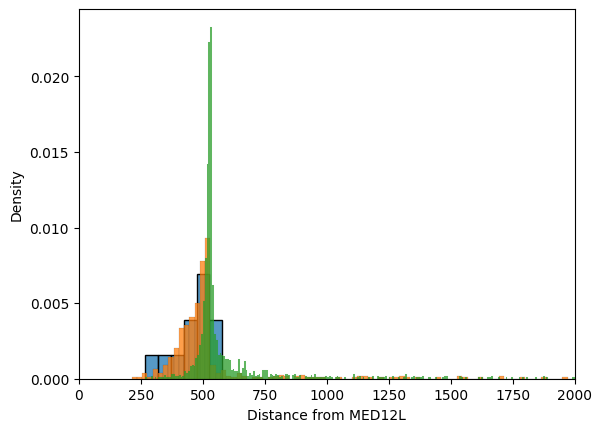

In [321]:
sns.histplot(MED12L_dist_TF, x = "Distance from MED12L", stat="density")
sns.histplot(MED12L_dist_comb, x = "Distance from MED12L", stat="density")
sns.histplot(dist_df, x = "Distance from MED12L", stat="density")
plt.xlim(0, 2000)

In [322]:
MED12L_dist_TF[MED12L_dist_TF["Distance from MED12L"] <= np.percentile(dist_df["Distance from MED12L"], 1)]

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
NR3C2,Transcription factors,"[Transcription, Transcription regulation]",267.898750,0.873539
POU6F2,Transcription factors,"[Transcription, Transcription regulation]",308.842112,0.828499
RFX3,Transcription factors,"[Differentiation, Transcription, Transcription...",344.481320,0.872544
NPAS2,Transcription factors,"[Biological rhythms, DNA damage, Transcription...",361.019902,0.822202


In [323]:
MED12L_dist_comb[MED12L_dist_comb["Distance from MED12L"] <= np.percentile(dist_df["Distance from MED12L"], 1)]

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
BRINP1,"[Predicted intracellular proteins, Transporters]","[Cell cycle, Growth arrest, Neurogenesis]",212.659046,0.923804
WDR17,"[Predicted intracellular proteins, Predicted m...",NaN,239.878844,0.942978
GABRA2,"[Disease related genes, FDA approved drug targ...","[Ion transport, Transport]",265.400377,0.857041
NR3C2,"[Disease related genes, FDA approved drug targ...","[Transcription, Transcription regulation]",267.898750,0.873539
DGKG,"[Enzymes, Metabolic proteins, Plasma proteins,...",[Lipid metabolism],275.421840,0.852493
FAT3,[Predicted membrane proteins],[Cell adhesion],275.985163,0.875579
JAKMIP2,"[Plasma proteins, Predicted intracellular prot...",NaN,294.597760,0.818328
DNAAF9,[Predicted intracellular proteins],NaN,297.933751,0.834916
BAALC,[Predicted intracellular proteins],NaN,306.785283,0.853816


<Axes: xlabel='MED12L Corr', ylabel='Density'>

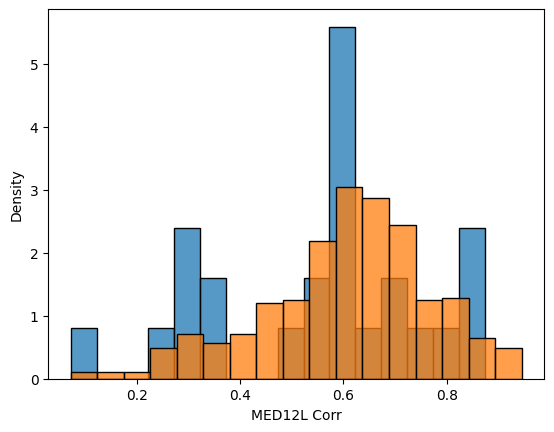

In [324]:
sns.histplot(MED12L_dist_TF, x = "MED12L Corr", stat="density", binwidth=0.05)
sns.histplot(MED12L_dist_comb, x = "MED12L Corr", stat="density", binwidth=0.05)

In [325]:
MED12L_dist_bioprocess

,Protein class,Biological process,Distance from MED12L,MED12L Corr
Gene,,,,
BRINP1,"[Predicted intracellular proteins, Transporters]",Cell cycle,212.659046,0.923804
BRINP1,"[Predicted intracellular proteins, Transporters]",Growth arrest,212.659046,0.923804
BRINP1,"[Predicted intracellular proteins, Transporters]",Neurogenesis,212.659046,0.923804
WDR17,"[Predicted intracellular proteins, Predicted m...",NaN,239.878844,0.942978
GABRA2,"[Disease related genes, FDA approved drug targ...",Ion transport,265.400377,0.857041
...,...,...,...,...
LRP1B,"[Cancer-related genes, Plasma proteins, Predic...",Endocytosis,6881.613835,0.824437
CSMD1,"[Plasma proteins, Predicted membrane proteins]",NaN,6998.974501,0.691500
KCNIP4,"[Predicted intracellular proteins, Transporters]",Ion transport,10464.646887,0.700284


(0.0, 1000.0)

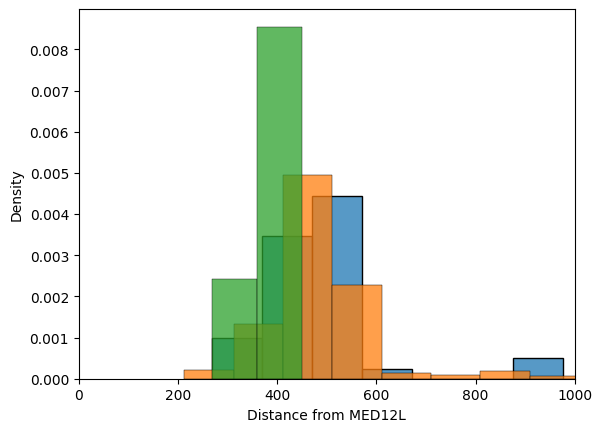

In [326]:
clust34_transcription = MED12L_dist_bioprocess[MED12L_dist_bioprocess["Biological process"] == "Transcription regulation"].drop(["Protein class", "Biological process"], axis = 1).drop_duplicates()
sns.histplot(clust34_transcription, x = "Distance from MED12L", stat="density", binwidth=100)
sns.histplot(MED12L_dist_comb, x = "Distance from MED12L", stat="density", binwidth=100)
sns.histplot(dist_df.sort_values("Distance from MED12L")[:50], x = "Distance from MED12L", stat="density", binwidth=100)
plt.xlim(0, 1000)

<Axes: xlabel='MED12L Corr', ylabel='Density'>

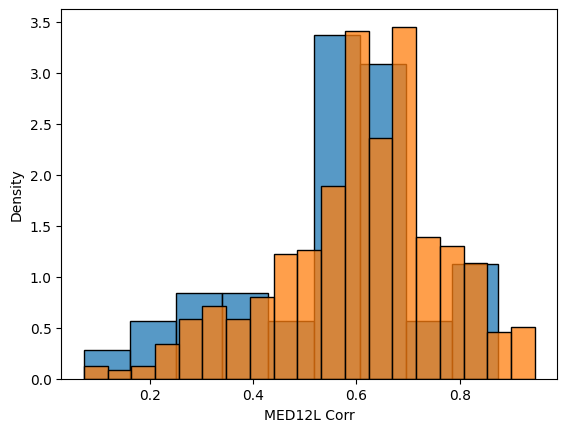

In [327]:
sns.histplot(clust34_transcription, x = "MED12L Corr", stat="density")
sns.histplot(MED12L_dist_comb, x = "MED12L Corr", stat="density")

<Axes: xlabel='MED12L Corr', ylabel='Density'>

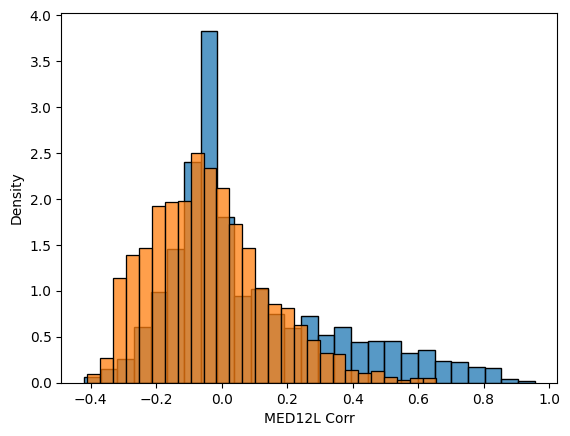

In [328]:
sns.histplot(dist_df.sort_values("MED12L Corr"), x = "MED12L Corr", stat="density")
sns.histplot(dist_df.sort_values("MED12 Corr"), x = "MED12 Corr", stat="density")

In [329]:
cluster34[[x in lambert_MED12L_like_TFs_dist_5percentile for x in cluster34["Gene"]]]

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Cancer prognostics - Pancreatic Adenocarcinoma (TCGA),Cancer prognostics - Pancreatic Adenocarcinoma (validation),Cancer prognostics - Prostate Adenocarcinoma (TCGA),Cancer prognostics - Rectum Adenocarcinoma (TCGA),Cancer prognostics - Rectum Adenocarcinoma (validation),Cancer prognostics - Skin Cuteneous Melanoma (TCGA),Cancer prognostics - Stomach Adenocarcinoma (TCGA),Cancer prognostics - Testicular Germ Cell Tumor (TCGA),Cancer prognostics - Thyroid Carcinoma (TCGA),Cancer prognostics - Uterine Corpus Endometrial Carcinoma (TCGA)
